In [1]:
import sys
sys.path.append('../just2017plots')
import numpy as np
from astropy.table import Table, vstack, Column
from astropy import units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import plotting_resources as res

In [2]:
slitcat = Table().read('../catalogs/personal_catalogs/slits_phot_zs_cutonslitdist.csv', format='csv')
cllist = res.load_clusters()

## For each cluster, calculate $\theta_{cl}$

In [3]:
final_table = Table()
for cl in cllist:
    if not cl['count']:
        print('skipping {}'.format(cl['papername']))
        continue
    subcat = slitcat[np.where(slitcat['field'] == cl['tablename'])]
    center = SkyCoord(cl['ra']*u.degree, cl['dec']*u.degree)
    objs = SkyCoord(subcat['ra']*u.degree, subcat['dec']*u.degree)
    subcat['theta_cl_radian'] = center.separation(objs).radian
    subcat['d_cl_mpc'] = subcat['theta_cl_radian']*cl['D_A']
    
    final_table = vstack([final_table, subcat])

skipping cl1037.9-1243a
skipping cl1103.7-1245b
skipping cl1227.9-1138a
skipping cl1301.7-1139a
skipping cl1354.2-1230a


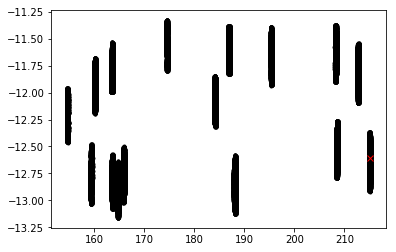

In [4]:
plt.plot(final_table['ra'], final_table['dec'], '.k')
plt.plot(cl['ra'], cl['dec'], 'rx')
c200 = plt.Circle((cl['ra'], cl['dec']), radius=(cl['r200']/cl['D_A'])*(180./np.pi), ec='r', fc='none');
cinfall = plt.Circle((cl['ra'], cl['dec']), radius = (cl['rinfall']/cl['D_A'])*(180./np.pi), ec='r', fc='none');
plt.gca().add_artist(c200);
plt.gca().add_artist(cinfall);

In [5]:
final_table.write('personal_catalogs/slits_phot_zs_cutonslitdist_rcl.csv', format='csv', overwrite=True)